<a href="https://colab.research.google.com/github/varshahakeem/Horse-or-Human-Prediction/blob/main/Human_or_horse_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q keras

In [ ]:
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
from keras.layers import BatchNormalization
from keras.regularizers import l2

import matplotlib.pyplot as plt

In [ ]:
keras.__version__

'2.9.0'

In [ ]:
 train_data_path="/content/drive/MyDrive/ ML projects datasets/horse-or-human/train"
 validation_data_path="/content/drive/MyDrive/ ML projects datasets/horse-or-human/validation"

## Data Preprocessing

In [ ]:
training_datagen=ImageDataGenerator(rescale=1./255,
                                    rotation_range=40,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    fill_mode='nearest')

In [ ]:
training_data =  training_datagen.flow_from_directory(train_data_path, 
                                      target_size=(150, 150), 
                                      batch_size=32,
                                      class_mode='binary')

Found 1027 images belonging to 2 classes.


In [ ]:
training_data.class_indices

{'horses': 0, 'humans': 1}

In [ ]:
valid_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
valid_data =  valid_datagen.flow_from_directory(validation_data_path, 
                                      target_size=(150, 150), 
                                      batch_size=32,
                                      class_mode='binary')

Found 256 images belonging to 2 classes.


In [ ]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

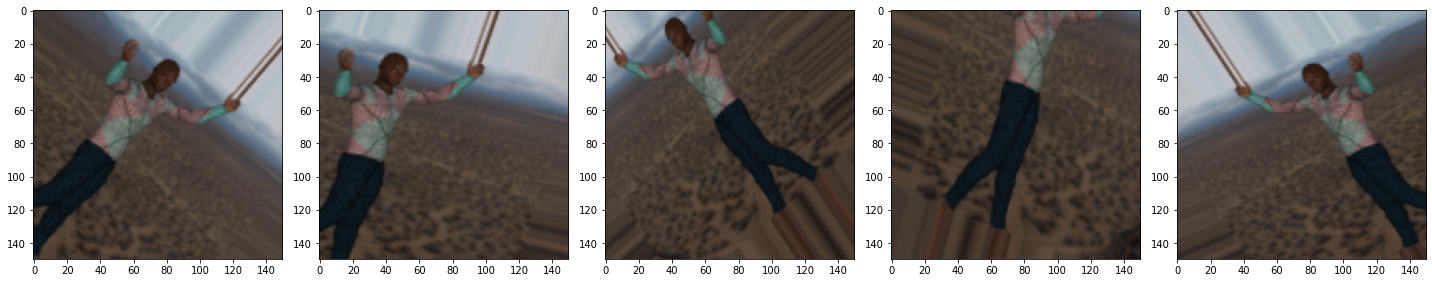

In [ ]:
images = [training_data[0][0][0] for i in range(5)]
plotImages(images)

## Building CNN Model

In [ ]:
cnn_model = keras.models.Sequential([
                                    keras.layers.Conv2D(filters=32, kernel_size=7, input_shape=[150, 150, 3],kernel_regularizer=l2(l=0.01)),
                                    BatchNormalization(),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                      
                                    keras.layers.Conv2D(filters=64, kernel_size=5),
                                    BatchNormalization(),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                      
                                    keras.layers.Conv2D(filters=128, kernel_size=3),
                                    BatchNormalization(),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                                                          
                                    keras.layers.Conv2D(filters=256, kernel_size=3),
                                    BatchNormalization(),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                                                      
                                    keras.layers.Flatten(), # neural network beulding
                                    keras.layers.Dense(units=128, activation='relu'), # input layers
                                    BatchNormalization(),
                                    keras.layers.Dropout(0.5),                                      
                                    keras.layers.Dense(units=256, activation='relu'),  
                                    BatchNormalization(),                                  
                                    keras.layers.Dropout(0.5),                                    
                                    keras.layers.Dense(units=2, activation='softmax') # output layer
])

In [ ]:
# compile cnn model
cnn_model.compile(optimizer = Adam(lr=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
model_path = '/content/drive/MyDrive/ ML projects datasets/horse-or-human/horse_or_human_predictor.h5'
checkpoint = ModelCheckpoint(model_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [ ]:
# train cnn model
history = cnn_model.fit(training_data, 
                          epochs=100, 
                          verbose=1, 
                          validation_data= valid_data,
                          callbacks=callbacks_list)

Epoch 1/100
33/33 [==============================] - ETA: 0s - loss: 1.0208 - accuracy: 0.6388
Epoch 1: val_accuracy improved from -inf to 0.50000, saving model to /content/drive/MyDrive/ ML projects datasets/horse-or-human/horse_or_human_predictor.h5
33/33 [==============================] - 298s 9s/step - loss: 1.0208 - accuracy: 0.6388 - val_loss: 0.8846 - val_accuracy: 0.5000
Epoch 2/100
33/33 [==============================] - ETA: 0s - loss: 0.8267 - accuracy: 0.7020
Epoch 2: val_accuracy did not improve from 0.50000
33/33 [==============================] - 125s 4s/step - loss: 0.8267 - accuracy: 0.7020 - val_loss: 0.8068 - val_accuracy: 0.5000
Epoch 3/100
33/33 [==============================] - ETA: 0s - loss: 0.8309 - accuracy: 0.7235
Epoch 3: val_accuracy did not improve from 0.50000
33/33 [==============================] - 124s 4s/step - loss: 0.8309 - accuracy: 0.7235 - val_loss: 1.3570 - val_accuracy: 0.5000
Epoch 4/100
33/33 [==============================] - ETA: 0s - los

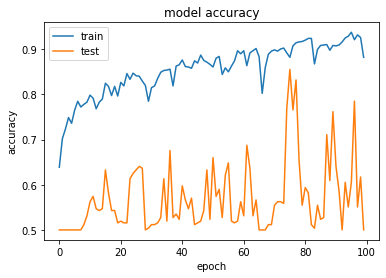

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

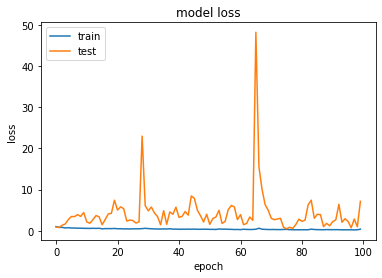

### Preprocessing

In [ ]:
#horse image path
h1='/content/drive/MyDrive/ ML projects datasets/horse-or-human/validation/horses/horse1-204.png'
h2='/content/drive/MyDrive/ ML projects datasets/horse-or-human/validation/horses/horse2-069.png'
h3='/content/drive/MyDrive/ ML projects datasets/horse-or-human/validation/horses/horse3-070.png'
h4='/content/drive/MyDrive/ ML projects datasets/horse-or-human/validation/horses/horse4-439.png'
h5='/content/drive/MyDrive/ ML projects datasets/horse-or-human/validation/horses/horse5-203.png'
h6='/content/drive/MyDrive/ ML projects datasets/horse-or-human/validation/horses/horse6-161.png'
h7='/content/drive/MyDrive/ ML projects datasets/horse-or-human/validation/horses/horse2-224.png'
h8='/content/drive/MyDrive/ ML projects datasets/horse-or-human/validation/horses/horse5-123.png'

#human image path
hu1='/content/drive/MyDrive/ ML projects datasets/horse-or-human/validation/humans/valhuman01-09.png'
hu2='/content/drive/MyDrive/ ML projects datasets/horse-or-human/validation/humans/valhuman02-18.png'
hu3='/content/drive/MyDrive/ ML projects datasets/horse-or-human/validation/humans/valhuman03-23.png'
hu4='/content/drive/MyDrive/ ML projects datasets/horse-or-human/validation/humans/valhuman04-24.png'
hu5='/content/drive/MyDrive/ ML projects datasets/horse-or-human/validation/humans/valhuman05-19.png'
hu6='/content/drive/MyDrive/ ML projects datasets/horse-or-human/validation/humans/valhuman01-13.png'


In [ ]:
import numpy as np
from tensorflow.keras.models import load_model
from keras.preprocessing import image

In [ ]:
model=load_model(model_path)

In [ ]:
def pred_human_horse(horse_or_human):
  test_image = keras.utils.load_img(horse_or_human, target_size = (150, 150))
  test_image = keras.utils.img_to_array(test_image)/255
  test_image = np.expand_dims(test_image, axis = 0)
  result = model.predict(test_image).round(3)
 
  pred = np.argmax(result) #returns index of the maximum value
  print(result, "--->>>", pred)
 
  if pred == 0:
    print('Predicted>>> Horse')
  else:
    print('Predicted>>> Human')

### Predict Output

In [ ]:
for horse_or_human in [h1,h2,h3,h4,h5,h6,h7,h8, hu1,hu2,hu3,hu4,hu5,hu6]:
  pred_human_horse(horse_or_human)

1/1 [==============================] - 0s 75ms/step
[[0.56 0.44]] --->>> 0
Predicted>>> Horse
1/1 [==============================] - 0s 80ms/step
[[0.014 0.986]] --->>> 1
Predicted>>> Human
1/1 [==============================] - 0s 74ms/step
[[0.993 0.007]] --->>> 0
Predicted>>> Horse
1/1 [==============================] - 0s 89ms/step
[[0.994 0.006]] --->>> 0
Predicted>>> Horse
1/1 [==============================] - 0s 73ms/step
[[0.959 0.041]] --->>> 0
Predicted>>> Horse
1/1 [==============================] - 0s 78ms/step
[[0.679 0.321]] --->>> 0
Predicted>>> Horse
1/1 [==============================] - 0s 69ms/step
[[0.72 0.28]] --->>> 0
Predicted>>> Horse
1/1 [==============================] - 0s 71ms/step
[[0.037 0.963]] --->>> 1
Predicted>>> Human
1/1 [==============================] - 0s 90ms/step
[[0.007 0.993]] --->>> 1
Predicted>>> Human
1/1 [==============================] - 0s 74ms/step
[[0.006 0.994]] --->>> 1
Predicted>>> Human
1/1 [==============================] - 0s 89